In [1]:
# Ajouter le dossier `src` au chemin de recherche Python
import sys
import os
sys.path.append(os.path.abspath('../src'))
from data_processing.preprocessing import *
from utils.plotting import *

In [8]:
# Liste des symboles des principales banques européennes
european_banks = [
    'BNP.PA',   # BNP Paribas
    'GLE.PA',   # Société Générale 
    'ACA.PA',   # Crédit Agricole 
    'HSBA.L',   # HSBC (UK)
    'BARC.L',   # Barclays (UK)
    'DBK.DE',   # Deutsche Bank (Germany)
    'UBSG.SW',  # UBS Group (Switzerland)
    'INGA.AS',  # ING Group (Netherlands)
    'ISP.MI',   # Intesa Sanpaolo (Italy)
    'SAN.MC',   # Banco Santander (Spain)
    'BBVA.MC'   # BBVA (Spain)
]

# à partir de 2013
start_date = '2010-01-01'
end_date = '2024-12-18'

data = prepare_stock_data(european_banks, start_date, end_date)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Téléchargement des données pour BNP.PA...
Téléchargement des données pour GLE.PA...
Téléchargement des données pour ACA.PA...



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Téléchargement des données pour HSBA.L...
Téléchargement des données pour BARC.L...
Téléchargement des données pour DBK.DE...
Téléchargement des données pour UBSG.SW...
Téléchargement des données pour INGA.AS...



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Téléchargement des données pour ISP.MI...
Téléchargement des données pour SAN.MC...
Téléchargement des données pour BBVA.MC...
Nombre de valeurs manquantes au début : 0
Nombre total de valeurs manquantes après traitement: 0


In [9]:
# Filtrer les colonnes associées à BNP.PA
bnp_data = data['BNP.PA']  # Cela sélectionne toutes les sous-colonnes sous 'BNP.PA'
# (Optionnel) Réinitialiser l'index pour une présentation plus lisible

bnp_data = bnp_data.reset_index()
bnp_data.columns = bnp_data.columns.get_level_values('Price')
bnp_data.columns = ['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
bnp_data = add_features(bnp_data, window_sizes=[5, 10])

bnp_data.head()

,Date,Adj Close,Close,High,Low,Open,Volume,ma_close_5,ma_volume_5,ma_close_10,ma_volume_10,log_return
0,2010-01-04,6.184280,12.349994,12.374068,11.955179,11.988883,6105758.0,6.347748,6352835.8,6.302421,6335057.6,0.015090
1,2010-01-05,6.278310,12.537772,12.749623,12.282587,12.325920,7195074.0,6.347748,6352835.8,6.302421,6335057.6,0.015090
2,2010-01-06,6.389218,12.759253,12.759253,12.479994,12.537772,5494119.0,6.347748,6352835.8,6.302421,6335057.6,0.017511
3,2010-01-07,6.391629,12.764068,12.764068,12.518512,12.672586,5533534.0,6.347748,6352835.8,6.302421,6335057.6,0.000377
4,2010-01-08,6.495302,12.971105,12.999994,12.720735,12.845920,7435694.0,6.347748,6352835.8,6.302421,6335057.6,0.016090


In [10]:
bnp_data.to_csv("bnp.csv", index=False) 

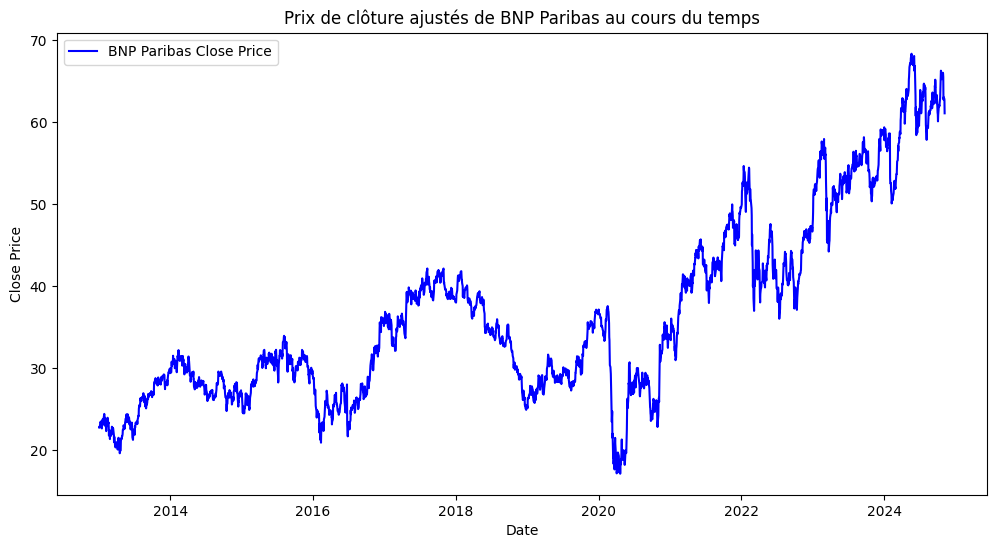

In [3]:
# Extraire la série des prix de clôture ajustés pour BNP Paribas
bnp_close_price = data[('BNP.PA', 'Adj Close')]

# Appeler la fonction pour tracer les prix
plot_close_price(bnp_close_price, "BNP Paribas")

In [4]:
# Appel de la fonction avec vos données
data = add_log_returns_and_volume(data, european_banks)

Calcul des log returns et du volume pour BNP.PA...


ValueError: Item must have length equal to number of levels.

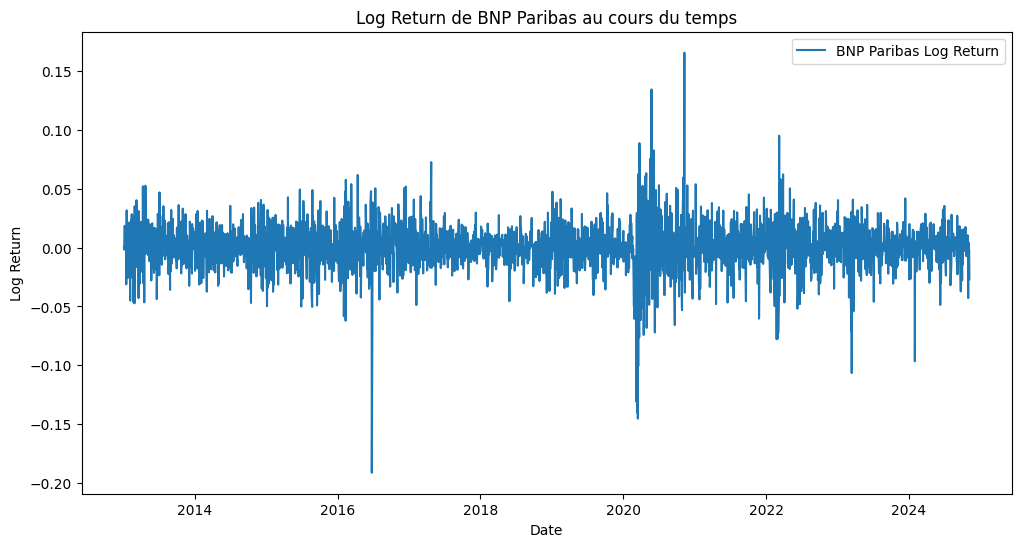

In [5]:
# Extraire la série des log returns pour BNP Paribas
bnp_log_return = data[('BNP.PA', 'Log Return')]

# Appeler la fonction pour tracer les log returns
plot_log_return(bnp_log_return, "BNP Paribas")


In [6]:
# Appel de la fonction pour ajouter des moyennes mobiles
data = add_moving_averages(data, european_banks, windows=[10, 50, 200])

Calcul des moyennes mobiles pour BNP.PA...
Calcul des moyennes mobiles pour GLE.PA...
Calcul des moyennes mobiles pour ACA.PA...
Calcul des moyennes mobiles pour HSBA.L...
Calcul des moyennes mobiles pour BARC.L...
Calcul des moyennes mobiles pour DBK.DE...
Calcul des moyennes mobiles pour UBSG.SW...
Calcul des moyennes mobiles pour INGA.AS...
Calcul des moyennes mobiles pour ISP.MI...
Calcul des moyennes mobiles pour SAN.MC...
Calcul des moyennes mobiles pour BBVA.MC...
Aperçu des données avec moyennes mobiles et colonnes conservées :
               BNP.PA                                                         \
                 Open       High        Low      Close  Adj Close     Volume   
Date                                                                           
2013-10-11  53.730000  53.880001  53.049999  53.400002  28.235111  2451196.0   
2013-10-14  52.980000  53.700001  52.540001  53.700001  28.393736  2217112.0   
2013-10-15  54.000000  54.330002  53.650002  54.169998  28

In [7]:
corr_matrix = data.corr()
high_corr_pairs = [(col1, col2) for col1 in corr_matrix.columns for col2 in corr_matrix.columns 
                   if col1 != col2 and abs(corr_matrix.loc[col1, col2]) > 0.9]
print("Paires de variables fortement corrélées :", high_corr_pairs)

Paires de variables fortement corrélées : [(('BNP.PA', 'Open'), ('BNP.PA', 'High')), (('BNP.PA', 'Open'), ('BNP.PA', 'Low')), (('BNP.PA', 'Open'), ('BNP.PA', 'Close')), (('BNP.PA', 'High'), ('BNP.PA', 'Open')), (('BNP.PA', 'High'), ('BNP.PA', 'Low')), (('BNP.PA', 'High'), ('BNP.PA', 'Close')), (('BNP.PA', 'Low'), ('BNP.PA', 'Open')), (('BNP.PA', 'Low'), ('BNP.PA', 'High')), (('BNP.PA', 'Low'), ('BNP.PA', 'Close')), (('BNP.PA', 'Close'), ('BNP.PA', 'Open')), (('BNP.PA', 'Close'), ('BNP.PA', 'High')), (('BNP.PA', 'Close'), ('BNP.PA', 'Low')), (('BNP.PA', 'Adj Close'), ('ACA.PA', 'Adj Close')), (('BNP.PA', 'Adj Close'), ('UBSG.SW', 'Adj Close')), (('BNP.PA', 'Adj Close'), ('INGA.AS', 'Adj Close')), (('BNP.PA', 'Adj Close'), ('BNP.PA', 'SMA_10')), (('BNP.PA', 'Adj Close'), ('BNP.PA', 'SMA_50')), (('BNP.PA', 'Adj Close'), ('BNP.PA', 'SMA_200')), (('BNP.PA', 'Adj Close'), ('ACA.PA', 'SMA_10')), (('BNP.PA', 'Adj Close'), ('UBSG.SW', 'SMA_10')), (('BNP.PA', 'Adj Close'), ('INGA.AS', 'SMA_10'))

In [9]:
# Supposons que 'combined_data' est votre DataFrame combiné, et 'european_banks' est votre liste de symboles.
cleaned_data = remove_high_and_open_and_low(data, european_banks)

Suppression des colonnes 'High' et 'Open' pour BNP.PA...
Suppression des colonnes 'High' et 'Open' pour GLE.PA...
Suppression des colonnes 'High' et 'Open' pour ACA.PA...
Suppression des colonnes 'High' et 'Open' pour HSBA.L...
Suppression des colonnes 'High' et 'Open' pour BARC.L...
Suppression des colonnes 'High' et 'Open' pour DBK.DE...
Suppression des colonnes 'High' et 'Open' pour UBSG.SW...
Suppression des colonnes 'High' et 'Open' pour INGA.AS...
Suppression des colonnes 'High' et 'Open' pour ISP.MI...
Suppression des colonnes 'High' et 'Open' pour SAN.MC...
Suppression des colonnes 'High' et 'Open' pour BBVA.MC...
Aperçu des données après suppression des colonnes 'High' et 'Open' :
               BNP.PA                           GLE.PA                        \
                Close  Adj Close     Volume      Close  Adj Close     Volume   
Date                                                                           
2013-10-11  53.400002  28.235111  2451196.0  40.595001  24.61

In [10]:
cleaned_data.head()

BNP.PA                           GLE.PA                        \
                Close  Adj Close     Volume      Close  Adj Close     Volume   
Date                                                                           
2013-10-11  53.400002  28.235111  2451196.0  40.595001  24.617388  4426528.0   
2013-10-14  53.700001  28.393736  2217112.0  40.685001  24.671970  2469233.0   
2013-10-15  54.169998  28.642241  3331359.0  41.570000  25.208645  4001216.0   
2013-10-16  54.299999  28.710983  3496535.0  41.845001  25.375412  3679322.0   
2013-10-17  54.250000  28.684547  3315322.0  41.834999  25.369343  2809182.0   

              ACA.PA                           HSBA.L  ...   INGA.AS  \
               Close Adj Close     Volume       Close  ...   SMA_200   
Date                                                   ...             
2013-10-11  8.646440  4.756439  6755152.0  689.599976  ...  3.932092   
2013-10-14  8.609848  4.736310  3719345.0  689.799988  ...  3.936523   
2013-10-15  8.742736  4.809412  5053171.0  687.400024  ...  3.941266   
2013-10-16  8.812070  4.847553  5551618.0  685.799988  ...  3.946023   
2013-10-17  8.859255  4.873509  4767092.0  678.000000  ...  3.951255   

              ISP.MI                        SAN.MC                      \
              SMA_10    SMA_50   SMA_200    SMA_10    SMA_50   SMA_200   
Date                                                                     
2013-10-11  0.899472  0.841232  0.734245  3.593636  3.313094  3.127040   
2013-10-14  0.912455  0.845009  0.735425  3.626161  3.325624  3.129271   
2013-10-15  0.920649  0.848861  0.736571  3.657601  3.339491  3.131775   
2013-10-16  0.927938  0.853044  0.737817  3.696024  3.354458  3.134698   
2013-10-17  0.935494  0.856619  0.739043  3.738364  3.368734  3.137642   

             BBVA.MC                      
              SMA_10    SMA_50   SMA_200  
Date                                      
2013-10-11  4.833614  4.393405  4.026500  
2013-10-14  4.872041  4.414257  4.032457  
2013-10-15  4.904930  4.437304  4.038563  
2013-10-16  4.946126  4.461971  4.044924  
2013-10-17  4.991278  4.484939  4.051140  

[5 rows x 77 columns]